In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# Import k-means from clustering stage.
from sklearn.cluster import KMeans

# Import foloum.
import folium # map rendering library

# Import Beautiful Soup.
from bs4 import BeautifulSoup

In [2]:
# Scrap data from the Wikipedia webpage.

website_url = requests.get("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M").text
soup = BeautifulSoup(website_url, 'lxml')
table = soup.find('table', {'class' : 'wikitable sortable'})

In [3]:
# Build a dataframe satisfying the conditions.

table_rows = table.find_all('tr')

data = []
for row in table_rows:
      data.append([t.text.strip() for t in row.find_all('td')])

df = pd.DataFrame(data, columns=['Postal Code', 'Borough', 'Neighbourhood'])
df = df[~df['Postal Code'].isnull()]  
df = df[df['Borough']!='Not assigned']
df = df.groupby(['Postal Code', 'Borough'], sort = False).agg(', '.join)
df = df.reset_index()
df

,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


In [4]:
# Obtain the location data from the csv file.  

link = "http://cocl.us/Geospatial_data"

location_df = pd.read_csv(link)
location_df

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
5,M1J,43.744734,-79.239476
6,M1K,43.727929,-79.262029
7,M1L,43.711112,-79.284577
8,M1M,43.716316,-79.239476
9,M1N,43.692657,-79.264848


In [5]:
analysis_df = pd.merge(df, location_df, on = 'Postal Code')
analysis_df

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village",43.667856,-79.532242
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
7,M3B,North York,Don Mills,43.745906,-79.352188
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


In [6]:
# Define the Foursqaure API information.
CLIENT_ID = 'Z1UHDJVTQPOPY2FISHHOLBWOOXFNVD0HJ0EXDFQ3Y3L125XR' # Foursquare ID
CLIENT_SECRET = '3DMNEBQAJYW3KIIPDHTP1PU3RYMFLBAUW4CGYZ0LMY5SQ1CK' # Foursquare Secret
VERSION = '20200716' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


Your credentails:
CLIENT_ID: Z1UHDJVTQPOPY2FISHHOLBWOOXFNVD0HJ0EXDFQ3Y3L125XR
CLIENT_SECRET:3DMNEBQAJYW3KIIPDHTP1PU3RYMFLBAUW4CGYZ0LMY5SQ1CK


In [7]:
# Create a function to exploare all the neighborhoods in Toronto.

def getNearbyVenues(names, latitudes, longitudes):
    radius = 500
    LIMIT = 100
    venues_list = []
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [8]:
toronto_venues = getNearbyVenues(names = analysis_df['Neighbourhood'],
                                   latitudes = analysis_df['Latitude'],
                                   longitudes = analysis_df['Longitude']
                                  )

Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Queen's Park, Ontario Provincial Government
Islington Avenue, Humber Valley Village
Malvern, Rouge
Don Mills
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
East Toronto, Broadview North (Old East York)
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmo

In [9]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix = "", prefix_sep = "")

# Add the neighborhood column back to dataframe.
toronto_onehot['Neighbourhood'] = toronto_venues['Neighbourhood'] 

# Move the neighborhood column to the first column.
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Neighbourhood,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hospital,Hot Dog Joint,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Luggage Store,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Post Office,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Social Club,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Summer Camp,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Parkwoods,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [10]:
toronto_bank = toronto_onehot.loc[ :, ['Neighbourhood', 'Bank']]
toronto_bank.head()

,Neighbourhood,Bank
0,Parkwoods,0
1,Parkwoods,0
2,Parkwoods,0
3,Victoria Village,0
4,Victoria Village,0


In [11]:
toronto_bank_merged = analysis_df

In [12]:
torbank_df = toronto_bank_merged.merge(toronto_bank.set_index('Neighbourhood'), on='Neighbourhood')
torbank_df.shape

(2223, 6)

In [13]:
null_df = torbank_df[torbank_df['Bank'] == 0].index
torbank_full_df = torbank_df.drop(null_df)

In [14]:
torbank_full_df.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Bank
47,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,1
84,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,1
154,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937,1
225,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,1
375,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,1


In [15]:
torbank_full_df.shape

(27, 6)

In [16]:
# Create map of  banks in  Toronoto using latitude and longitude values.
bank_map_toronto = folium.Map(location = [43.653908, -79.384293], zoom_start = 10)

# Add markers to map.
for Bank, Long, Lat, poi in zip(torbank_full_df['Bank'], torbank_full_df['Longitude'], torbank_full_df['Latitude'], torbank_full_df['Neighbourhood']):
    label = '{}'.format(str(poi), parse_html = True)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [Lat, Long],
        radius = 5.0,
        popup = label,
        color ='green',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.7,
        parse_html = False).add_to(bank_map_toronto)  
    
bank_map_toronto

In [18]:
torbank_clustering = torbank_full_df.drop(['Postal Code', 'Borough', 'Neighbourhood', 'Bank'], 1)
torbank_clustering.head()

,Latitude,Longitude
47,43.654260,-79.360636
84,43.662301,-79.389494
154,43.706397,-79.309937
225,43.657162,-79.378937
375,43.763573,-79.188711


In [20]:
import numpy as np 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [21]:
SSE = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters = k)
    kmeanModel.fit(torbank_clustering)
    SSE.append(kmeanModel.inertia_)

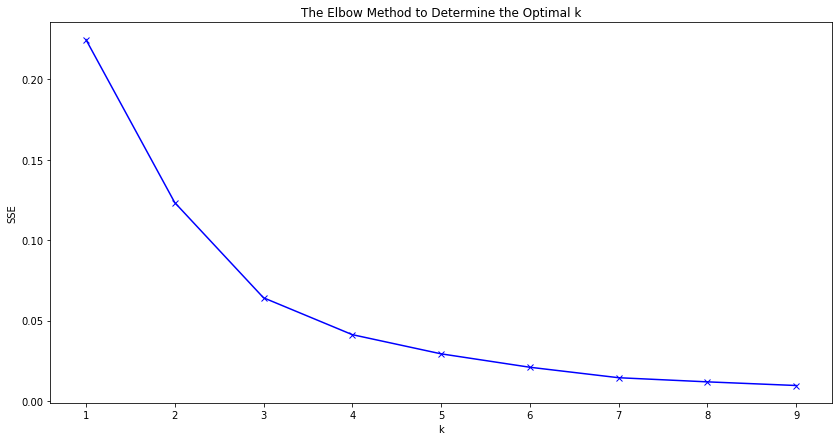

In [23]:
plt.figure(figsize = (14, 7))
plt.plot(K, SSE, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method to Determine the Optimal k')
plt.show()

In [24]:
# Set thenumber of clusters.
kclusters = 3

# Run k-means clustering.
kmeans = KMeans(n_clusters = kclusters, random_state = 0).fit(torbank_clustering)

In [25]:
torbank_clustering.insert(0, 'Cluster Labels', kmeans.labels_)
torbank_clustering.head()

,Cluster Labels,Latitude,Longitude
47,2,43.654260,-79.360636
84,2,43.662301,-79.389494
154,0,43.706397,-79.309937
225,2,43.657162,-79.378937
375,0,43.763573,-79.188711


In [28]:
# Create a map.
torbank_map_clusters = folium.Map(location=[43.653908, -79.384293], zoom_start = 10)

# Set color scheme for the clusters.
x = np.arange(kclusters)
ys = [i + x + (i * x) ** 2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# Add markers to the map.
markers_colors = []
for lat, lon, cluster in zip(torbank_clustering['Latitude'], torbank_clustering['Longitude'], torbank_clustering['Cluster Labels']):
    label = folium.Popup(' Cluster ' + str(cluster), parse_html = True)
    folium.CircleMarker(
        [lat, lon],
        radius = 5,
        popup = label,
        color = rainbow[cluster-1],
        fill = True,
        fill_color = rainbow[cluster-1],
        fill_opacity = 0.7).add_to(torbank_map_clusters)
       
torbank_map_clusters